## 1. Introduction

>Heart disease, also known as cardiovascular disease, describes the range of conditions that affect the heart.

**Types of heart diseases include:**
* Abnormal heart rhythms(arrhythmias)
* Heart valve diseases
* Myocardial infarction(heart attack)
* Heart failure
* Congenital heart defects
* Dilated cardiomyopathy

Risk factors for heart disease can be classified as either modifiable or non-modifiable.

`Non-Modifiable` risk-factors include:

- Age
- Gender
- Family history
- Genetics

`Modifiable` risk-factors include:

- Smoking
- High Blood Pressure(Hypertension)
- High Cholesterol
- Drug Abuse
- Diabetes
- Obesisty
- Physical inactivity




## 2. Project Goal

>In this project, the main objective is to develop a machine learning model that can classify a person's risk of having heart disease, with 1 being at a high risk and 0 being at a low risk.



## 3. Project Data

The dataset used was sourced from [kaggle](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset)

## 4. Features

The features used for classification include:

|Feature|Assigned Code|Unit|Description|
|:-----|:-----|:-----|:-----|
|Age|age|Years|Patient's age|
|Gender|gender|1=male; 0=female|The sex of the patient|
|Chest pain type|chestpain|codes from 0-3|<ul><li>0:**Typical Angina**: Common heart-related chest pain.</li><li> 1:**Atypical Angina**: Chest discomfort that's not typical angina.</li><li>2:**Non-Anginal pain**: Pain not related to the heart.</li><li> 3:**Asymptomatic**:Absence of chest pain, but hints at potential heart issues.</li></ul>|
|Resting blood pressure|restingBP|in mmHg |Measures blood pressure when relaxed. Anything above 120/90 is typically cause for concern|
|Serum cholesterol|serumcholestrol|in mg/dl|Indicates the amount of total cholesterol in blood.Elevated levels  can be a precursor to artery blockages|
|Fasting blood sugar|fastingbloodsugar|0,1|Highlights if blood sugar levels are unusually high when fasting.The fasting blood sugar> 120mg/dl<ul><li>1=true(signals diabetes)</li><li>0=false</li></ul>|
|Resting electrocardiogram results|restingrelectro|codes from 0-2|The electrical rhythm of the heart<ul><li>0:**Normal**: nothing to note</li><li> 1:**ST-T Wave abnormality**: T wave inversions and/or ST wave elevation or depression of > 0.05mV. Potential disturbances in rhythm</li><li>2: **Possible or definite left ventricular hypertrophy**:Indicates the heart's left side might be working too hard.</li></ul>|
|Maximum heart rate achieved|maxheartrate|71-202bpm|The heart's top speed during tests, suggesting how well or poorly the heart pumps.The average resting heart rate is between 60 and 100.The more fit you are, the lower your resting heart rate.The maximum rate is based on your age, as subtracted from 220(So for a 50-year-old, maximum heart rate is 220 minus 50, or 170 beats per minute.)|
|Exercise induced angina|exerciseangia|0,1|Does physical activity induce pain? If yes, it's a potential red flag.<ul><li>0:No</li><li> 1:Yes</li></ul>|
|Oldpeak =ST|oldpeak|0-6.2|ST-depression induced by exercise relative to rest,looks at stress during exercise(unhealthy heart will stress more)|
|Slope of the peak exercise ST segment|slope|codes from 1-3|<ul><li>1:**Upsloping**: Better heart rate with exercise(uncommon)</li><li> 2:**Flat**: Minimal change(typical healthy heart)</li><li>3:**Downsloping**: Signs of unhealthy heart</li></ul>|
|Number of major vessels|noofmajorvessels|codes from 0-3|coloured by flourosopy<ul><li>coloured vessel means the doctor can see blood passing through</li><li>the more blood movement the better, indicates no clots</li></ul>|

## 5. Workflow

The steps followed include:
1. [Import the necessary libraries](#libraries)
2. [Loading the dataset](#dataset)
3. [Exploratory Data Analysis](#eda)
4. [Cleaning and Transforming the data](cleaning)
5. [Feature Selection](#selection) 
6. [Feature Scaling](#scaling)
7. [Modeling](#model)
8. [Prediction](#prediction)
9. [Comparison](#comparison)
10. [Conclusion](#Conclusion)



<a name="libraries"></a>
### 1. Importing libraries
I'll be using pandas, Matplotlib and NumPy for data analysis and manipulation

In [2]:
# Importing all libraries needed 

# regular EDA and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50) # expand number of columns shown in dataframe
%matplotlib inline 

# suppress scientific notation by setting float_format
# pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.float_format', '{:.2f}'.format)
 
#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### 2.Loading the dataset

In [3]:
heart_df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
heart_df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.30,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.70,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.00,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.20,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.30,3,2,1


In [4]:
heart_df.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.60,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.70,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.40,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.90,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.70,0,0,0


### 3. Exploratory Data Analysis

In [5]:
#shape
heart_df.shape

(1000, 14)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [7]:
# find out count of each class
heart_df.target.value_counts()

1    580
0    420
Name: target, dtype: int64

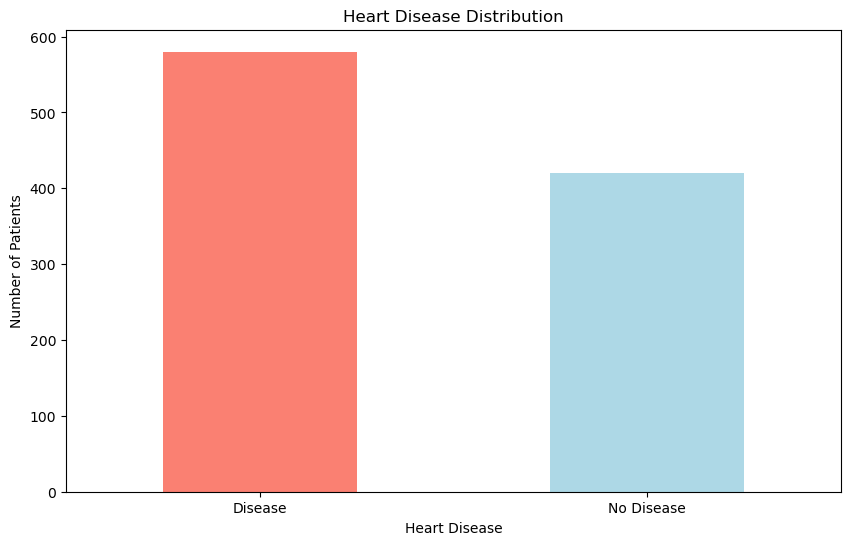

In [8]:
# checking how heart disease is distributed
heart_df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"], figsize=(10,6));

label = ["Disease", "No Disease"]
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
plt.xticks([0, 1], label, rotation=0);

The dataset can be said to be balanced having an approximate percentage ratio of `60:40`.\
For balanced datasets, accuracy is a good enough metric to evaluate performance of binary classification models.However, I'll also work with other metrics like Precision, Recall,F-Beta score, and ROC and AUC curves.

In [9]:
#checking for missing values
heart_df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [10]:
# checking for duplicate rows
heart_df.duplicated().sum()

0

In [11]:
#statistical summary
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.00,5048704.41,2895904.50,103368.00,2536439.50,4952508.50,7681877.00,9990855.00
age,1000.00,49.24,17.86,20.00,34.00,49.00,64.25,80.00
gender,1000.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00
chestpain,1000.00,0.98,0.95,0.00,0.00,1.00,2.00,3.00
restingBP,1000.00,151.75,29.97,94.00,129.00,147.00,181.00,200.00
serumcholestrol,1000.00,311.45,132.44,0.00,235.75,318.00,404.25,602.00
fastingbloodsugar,1000.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
restingrelectro,1000.00,0.75,0.77,0.00,0.00,1.00,1.00,2.00
maxheartrate,1000.00,145.48,34.19,71.00,119.75,146.00,175.00,202.00
exerciseangia,1000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


In [12]:
heart_df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

#### Heart disease Frequency according to Gender

In [13]:
heart_df.gender.value_counts()

1    765
0    235
Name: gender, dtype: int64

In [14]:
# Compare target column and gender column
pd.crosstab(heart_df.target, heart_df.gender)

gender,0,1
target,,
0,102,318
1,133,447


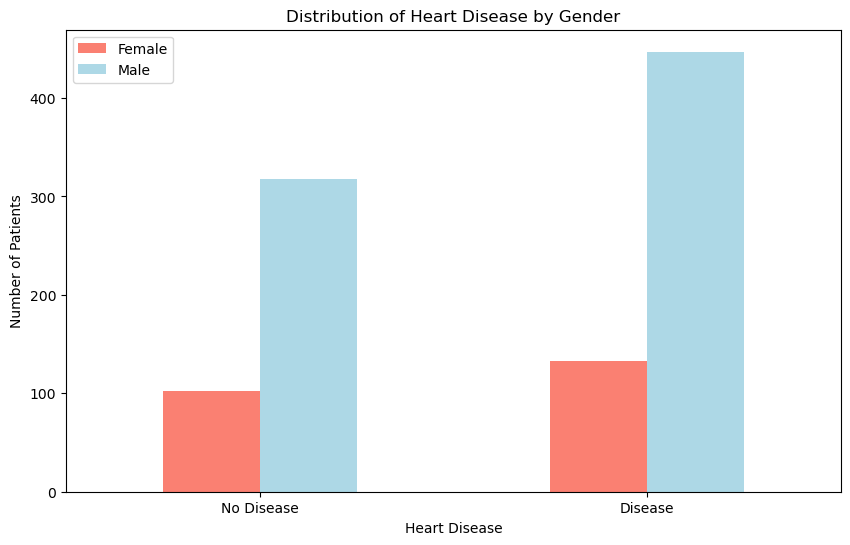

In [15]:
# plot of the cross tab
pd.crosstab(heart_df.target, heart_df.gender).plot(kind="bar",
                                                  figsize=(10,6),
                                                  color=["salmon", "lightblue"])
labels = ["No Disease", "Disease"]
positions = [0, 1]
plt.title("Distribution of Heart Disease by Gender")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
plt.xticks(positions, labels, rotation=0)
plt.legend(["Female", "Male"]);

From the plot, we can observe that for people that don't have heart disease(xlabel=0),and those that have heart diease(xlabel=1) there are more males than females.

I think,the huge ratios can be influenced by the fact that about 70%of the patients in the dataset are male and 30% are female.

In [16]:
heart_df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

#### age vs  maxheartrate for heart disease

In [17]:
heart_df.age[heart_df.target==1]

0      53
3      43
4      31
5      24
6      79
       ..
992    77
993    25
995    48
997    69
998    45
Name: age, Length: 580, dtype: int64

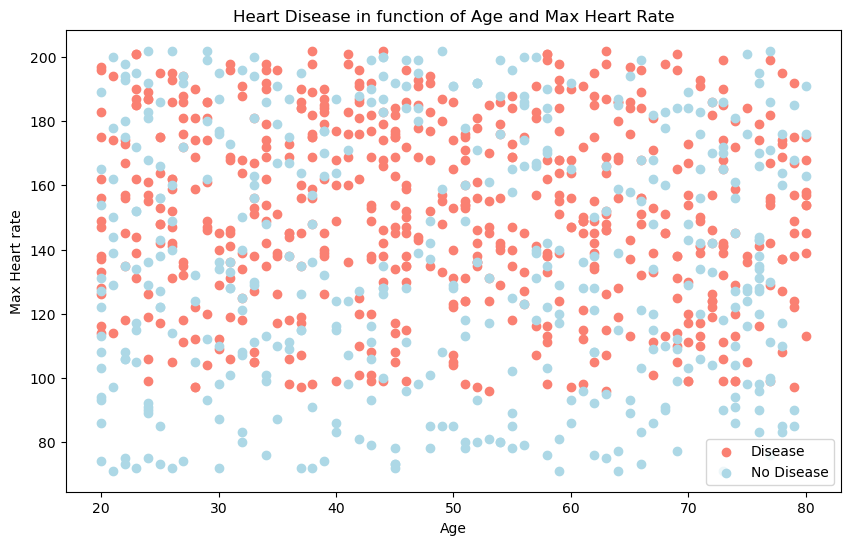

In [18]:
# create a figure
fig, ax = plt.subplots(figsize=(10,6))

# scatter with heart disease
plt.scatter(heart_df.age[heart_df.target==1],
                heart_df.maxheartrate[heart_df.target==1],
                c="salmon")

# scatter without heart disease
plt.scatter(heart_df.age[heart_df.target==0],
           heart_df.maxheartrate[heart_df.target==0],
           c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend(["Disease", "No Disease"])
ax.set_xlabel("Age")
ax.set_ylabel("Max Heart rate");

There seems to be no linear correlation between the age and maxheartrate for patients with and without heart disease.

This is unusual considering from the feature description of Maximum Heart Rate:
>"The maximum rate is based on your age as subtracted from 220"


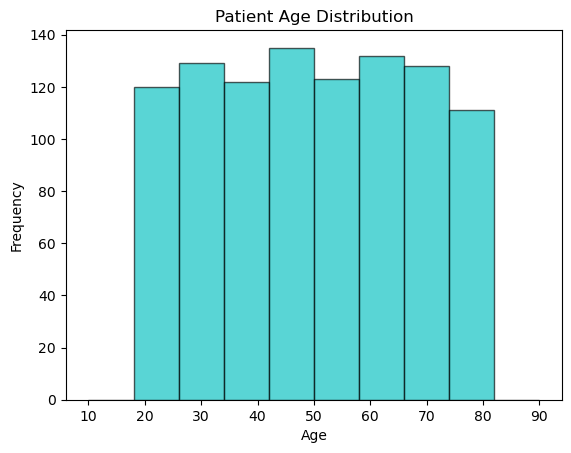

In [19]:
# visualizing the frequency of the patients' ages
plt.hist(heart_df.age, color='c', edgecolor='k', range = [10, 90], alpha = 0.65 )
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency");

The ages of the patients are almost uniformly distributed

#### How chestpain type relates to heart disease

<ul><li>0:Typical angina: chest pain related decrease blood supply to the heart</li><li> 1:Atypical angina: chest pain not related to the heart</li><li>2: Non-anginal pain: typically esophageol spasms (non-heart related)</li><li> 3:Asymptomatic:chest pain not showing signs of disease</li></ul>

In [20]:
pd.crosstab(heart_df.chestpain, heart_df.target).T

chestpain,0,1,2,3
target,,,,
0,312,70,33,5
1,108,154,279,39


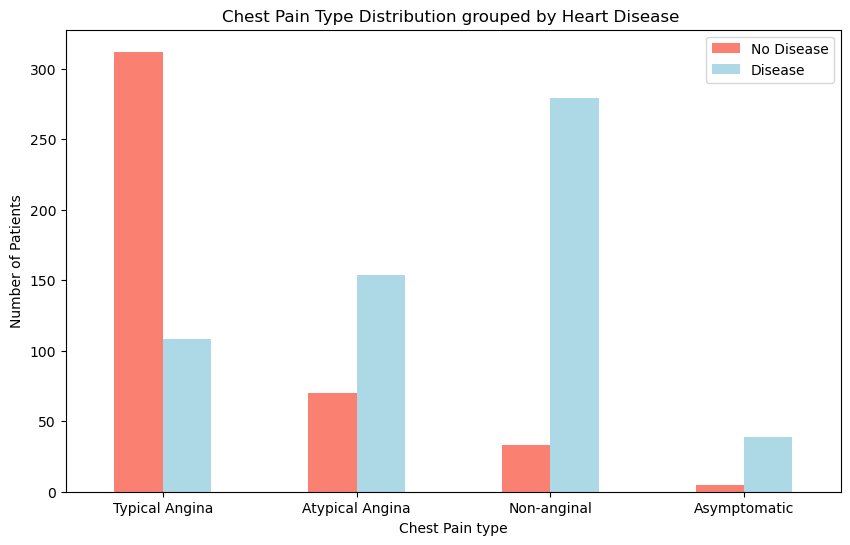

In [21]:
# visual of above

pd.crosstab(heart_df.chestpain, heart_df.target).plot(kind="bar",
                                                     figsize=(10,6),
                                                     color=["salmon", "lightblue"])

labels = ["Typical Angina", "Atypical Angina", "Non-anginal","Asymptomatic"]
label_pos = [0, 1, 2, 3]
plt.title("Chest Pain Type Distribution grouped by Heart Disease ")
plt.xlabel("Chest Pain type")
plt.ylabel("Number of Patients")
plt.xticks(label_pos, labels, rotation=0)
plt.legend(["No Disease", "Disease"]);


Based on the graph, we can see that a 3:1 ratio of patients with typical angina (heart-related chest discomfort) do not have heart disease. This observation seems odd. To further compound this oddity, there are more people with heart disease than not among individuals who report chest pain unrelated to the heart.

#### Correlation Matrix

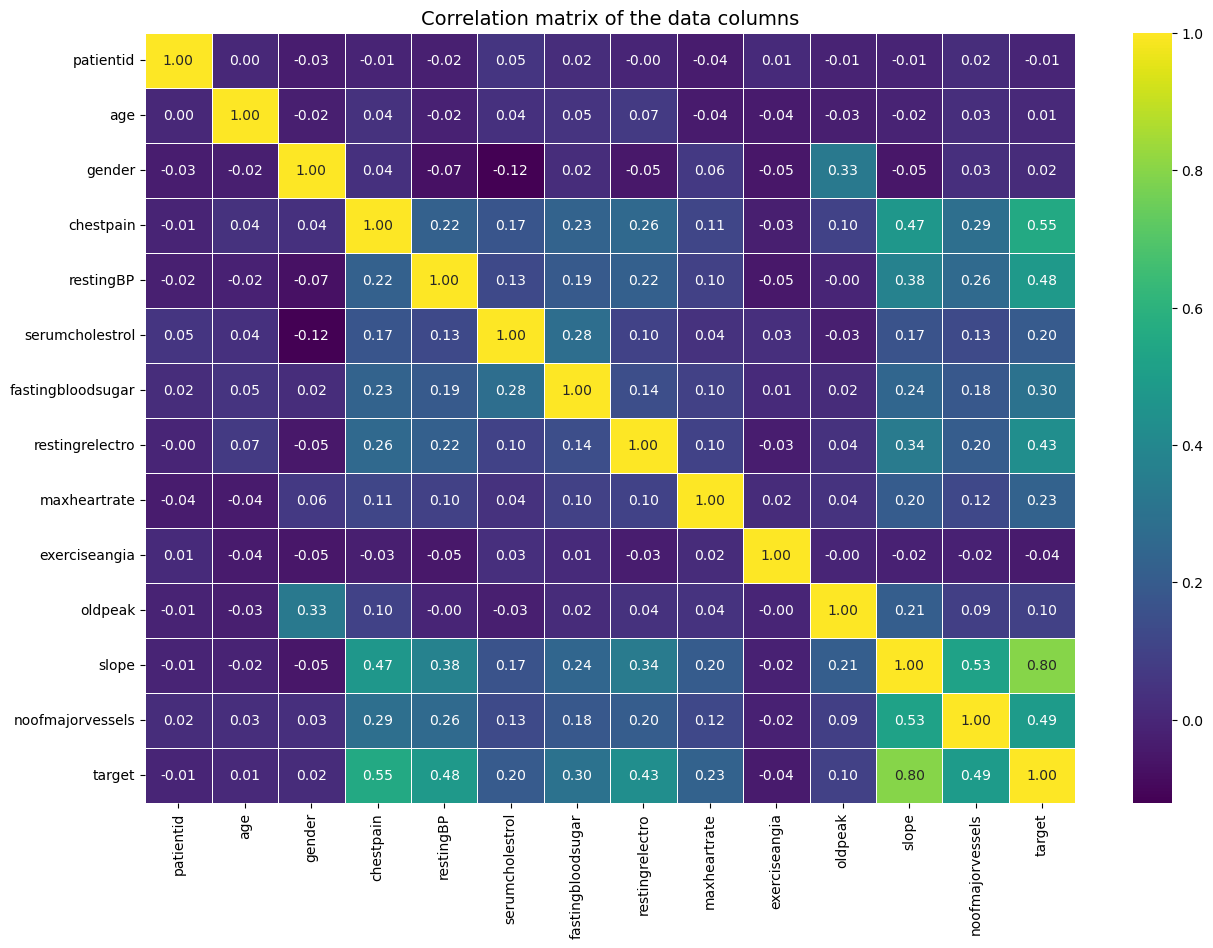

In [22]:
# correlation matrix
heart_corr = heart_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(heart_corr,
                 fmt='.2f',
                 cmap='viridis',
                 annot=True,
                 linewidths=0.5);
plt.title("Correlation matrix of the data columns", fontsize=14);


#### Average of some features for the classes.
  

In [23]:
# getting averages of the features then grouping them according to class
features_of_interest = ["age", "serumcholestrol", "restingBP", "maxheartrate"]
heart_df.groupby(by="target")[features_of_interest].mean().apply(lambda x: round(x, 2))

,age,serumcholestrol,restingBP,maxheartrate
target,,,,
0,49.07,281.06,134.77,136.31
1,49.37,333.45,164.04,152.12


- It appears that the average age of people with and without heart disease is the same i.e ~49 years.
- The average serum cholestrol of patient's presenting heart disease is 52.4mg/dl higher than those that are non-presenting.
- The average resting blood pressure of patient's presenting heart disease is 29.27mmHg higher than those that are non-presenting.
- The average maximum heart rate of patient's presenting heart disease is 15.81bpm higher than those that are non-presenting.

#### Old peak distribution according to class

<!-- <img src="ECG Interpretation.jpg", alt="isolated", height=50, width=50/> -->
Oldpeak measures the degree of abnormality in the ECG during peak exercise compared to rest, and it's used as an indicator of heart health and potential cardiac issues

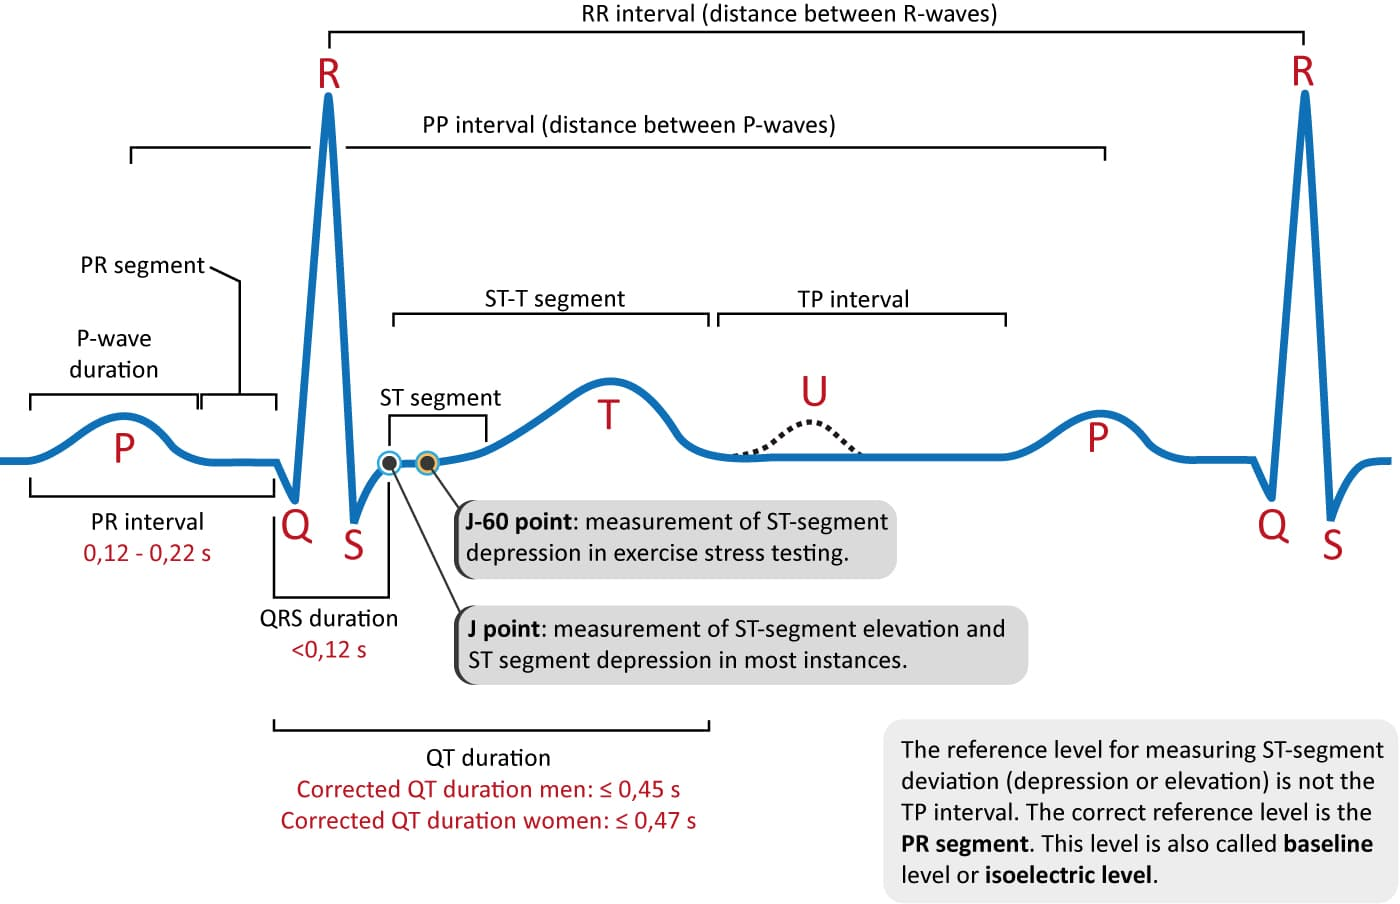

#### Slope of the peak exercise ST segment relation to target

<ul><li>1:Upsloping: better heart rate with execise(uncommon)</li><li> 2:flat: minimal change(typical healthy heart)</li><li>3: downsloping: signs of unhealthy heart</li></ul>

In [24]:
heart_df.slope.value_counts()

2    322
1    299
3    199
0    180
Name: slope, dtype: int64

In [25]:
pd.crosstab(heart_df.slope, heart_df.target).T

slope,0,1,2,3
target,,,,
0,180,228,12,0
1,0,71,310,199


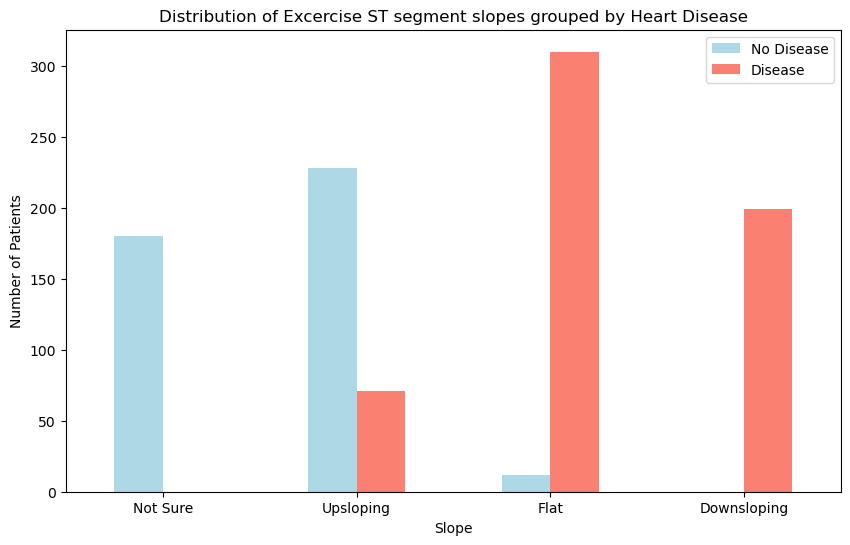

In [26]:
pd.crosstab(heart_df.slope, heart_df.target).plot(kind="bar",
                                                 figsize=(10,6),
                                                 color=["lightblue","salmon"])
labels = ["Not Sure", "Upsloping", "Flat","Downsloping"]
positions = [0, 1, 2, 3]
plt.title("Distribution of Excercise ST segment slopes grouped by Heart Disease")
plt.xlabel("Slope")
plt.ylabel("Number of Patients")
plt.xticks(positions, labels, rotation=0)
plt.legend(["No Disease","Disease"]);

From the above bar graph,the highest number of patients with disease with respect to the slope, are those who have a flat slope(indicating a healthy heart).This is peculiar.

All patients who had a downward slope(unhealthy heart) had heart disease.

In [27]:
people_with_zero = heart_df.loc[heart_df["slope"] == 0]
people_with_zero

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.80,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.00,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.80,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.60,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.90,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.20,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.50,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.10,0,0,0


In [28]:
# oldest person(s) with heart disease
oldest_person_1 = heart_df[(heart_df["age"] == heart_df["age"].max()) & (heart_df["target"] == 1)]
oldest_person_1

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
177,1780544,80,1,2,126,427,1,0,145,0,4.10,2,2,1
290,2879204,80,1,1,197,194,0,2,168,0,5.90,3,1,1
451,4507674,80,1,2,134,277,0,0,154,0,0.70,3,3,1
461,4612336,80,1,1,197,246,1,1,158,1,3.50,2,2,1
547,5446017,80,0,1,191,433,1,1,154,1,3.20,3,3,1
623,6316727,80,0,2,98,460,1,1,139,1,2.60,3,3,1
743,7618628,80,1,2,177,452,0,1,157,0,0.40,3,1,1
923,9262290,80,1,2,171,356,1,0,175,1,2.40,2,1,1
967,9661522,80,1,1,199,212,0,1,113,0,0.60,1,0,1


In [29]:
# youngest person(s) with heart disease
youngest_person_1 = heart_df[(heart_df["age"] == heart_df["age"].min()) & (heart_df["target"] == 1)]
youngest_person_1

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
53,690148,20,1,2,189,231,0,0,114,1,2.40,3,1,1
152,1604440,20,1,1,163,0,0,0,147,1,5.50,3,3,1
163,1666741,20,0,0,189,545,0,2,116,1,3.20,2,3,1
186,1889122,20,1,0,156,354,0,0,197,1,2.10,3,1,1
202,2060446,20,0,0,186,359,1,2,196,0,2.70,3,2,1
229,2301297,20,0,0,183,0,0,2,175,1,1.30,3,2,1
234,2356338,20,1,0,140,498,0,0,137,1,0.20,3,2,1
324,3178004,20,1,2,136,264,0,1,162,0,5.00,3,3,1
550,5492014,20,0,1,198,280,1,2,183,0,3.20,3,0,1
598,6078916,20,1,1,168,383,1,0,128,0,2.30,1,0,1


### 4. Cleaning the data

In [30]:
heart_df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

Dropping the `patientid` column since it's useful in prediction

In [31]:
heart_df.drop('patientid', axis=1, inplace=True)
heart_df.sample(2)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
458,76,0,2,193,327,0,1,143,1,2.40,2,2,0
14,58,1,0,170,354,0,0,170,0,5.60,1,0,0


### 5. Feature Selection


In [32]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [33]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#copying and test features
X_train_copy = np.copy(X_train)
X_test_copy = np.copy(X_test)

### Evaluation metrics for classification models recap

#### 1. Confusion Martrix 
A confusion matrix is an error matrix. It is presented as a table in which the predicted class is compared with the actual class.

```python

conf_matrix = confusion_matrix(actual, predicted)
# getting the percentages of the groups in the matrix
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
group_percentages
```


```python
# plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
```

#### 2. Precision
Measures how accurate the postive predictions are.
Precision is of utmost importance when performing medical diagnostics. A high precision ensures that a postive dignosis is reliable, reducing chances of unnecessary stress, follow up tests, or treatments for patients.

```python
precision = precision_score(actual, predicted)
```

#### 3. Recall
When classifying whether a person has heart disease or not,it's of greater importance to reduce False Negatives(Type II Errors) than False Positives(Type I Errors).\
**False Postive(FP)**:Predicted value is a positive when it's actually/correct value is negative.\
**False Negative(FN)**: Predicted value is a negative when the correct value is a positive.\
A FN in this case would be predicting that a person doesn't have heart disease, when they actually have it. 
Since the FN is important,a good metric to evaluate model performance is Recall.\
In medical diagnostics, recall is paramount. High recall ensures the model can effectively identify all cases of a disease, reducing the risk of missing diagnoses.

```python
recall = recall_score(actual, predicted)
```

#### F-Beta score
This metric combines recall and precision into a single value. It is a useful metric when both FP and FN are important.

The value of Beta can vary depending on the dataset, the common beta values are 0.5, 1, and 2 for F0.5 Score, F1-Score, and F2-Score respectively.

- F0.5_Score: used when FP has more impact in the classification problem.
- F1_Score: used when FN and FP are equally important 
- F2_Score: used when FN has more impact in the classification problem.

In medical diagnostics, as explained above, the values of FN and FP are very important, and that is why I'll use the F1-Score to evaluate the models.

```python
f1_score = f1_score(actual, predicted)
```

#### 4. Receiver Operating Characteristic (ROC) Curve

It's a graphical representation of a classification's model ability to distinguish between positive and negative classes at various classification thresholds.

*In metrics like accuracy, the default threshold used is 0.5*

ROC plots the True Positive Rate(TPR)/Recall/Sensitivity against the False Positive Rate(FPR).

*FPR: measures the proportion of negative instances incorrectly classified as positive*

In the ROC Curve, the TPR is represented in the y-axis, while the FPR represented in the x-axis.
A typical ROC curve looks like an ascending curve, moves from bottom left to top right. The ideal ROC curve would be a right-angle curve,moves from bottom left to top left corner.

```python
fpr, tpr, thresholds = roc_curve(actual, predicted)
```

#### 5. Area Under the ROC Curve (AUC)
It quantifies the overall performance of the classification model.
Used to measure the area under the ROC Curve, ranging from 0 to 1.
|AUC value|Interpretation|
|:--------|:-------------|
|0.5|Model's perfomance is equivalent to random guessing|
|1.0|Perfect discrimination-model can perfectly distinguish between positive and negative instances at all thresholds|

Higher AUC values indicate better model performance.

```python
roc_auc = auc(fpr, tpr)
```

```python
# plotting the ROC-AUC curve

# plot ROC curve with label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC CURVE (area=%0.2f)' % roc_auc)

# plo a dashed horizontal line for reference
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='---')

# setting the x and y axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# labelling the axes
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-AUC Curve")
plt.legend(loc='lower right')
```

### 6. Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
#scaler instance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)


### 7.Modelling

In [37]:
# sklearn models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [38]:
# create function to train and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    
    # set random seed
    np.random.seed(42)
    
    # make dictionary to keep model scores
    model_scores = {}
    
    # loop through model
    for name, model in models.items():
        
        # fit the model to data
        model.fit(X_train, y_train)
              
        # evaluate model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
        
        
    return model_scores

In [39]:
model_scores = fit_score(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores

C:\Users\chiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.945, 'Random Forest': 0.99, 'Decision Tree': 0.96}

The estimator/model `score()` method: Return the mean accuracy on the given test data and labels.

#### Model Comparison

In [40]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare_T = model_compare.T
model_compare_T

,accuracy
Logistic Regression,0.94
Random Forest,0.99
Decision Tree,0.96


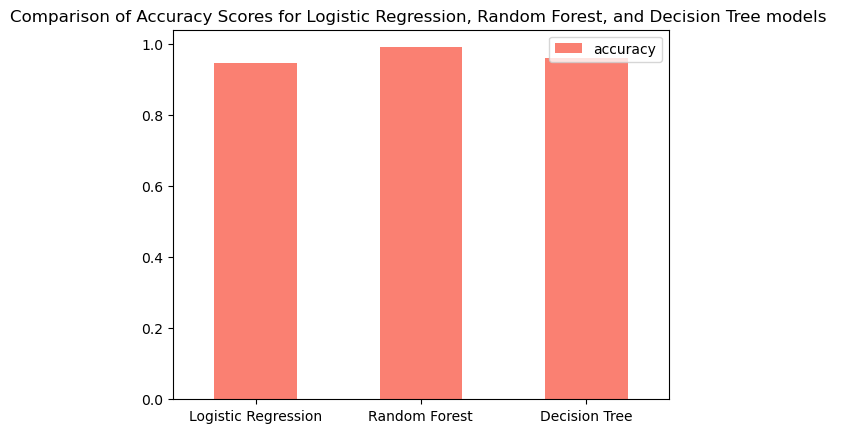

In [41]:
# visually comparing the models
model_compare_T.plot.bar(color="salmon");
plt.xticks(rotation=0)
plt.title("Comparison of Accuracy Scores for Logistic Regression, Random Forest, and Decision Tree models ")
plt.legend(loc="upper right");

In [42]:
# create function to fit, predict and evaluate the models
def fit_score_two(models, X_train, X_test, y_train, y_test):
    
    # set random seed
    np.random.seed(42)
    
    # make dictionaries to keep evaluation scores
    model_scores = {}
    precision_scores = {}
    recall_scores = {}
    f1_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model to data
        model.fit(X_train, y_train)
        
        # make prediction
        y_predict = model.predict(X_test)
         
        # evaluate model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
        
        # get model's precision score and append to precision scores
        precision_scores[name] = precision_score(y_test, y_predict)
        
        # get model's recall score and append to recall scores
        recall_scores[name] = recall_score(y_test, y_predict) 
      
        # get model's f1 score and append to f1 scores
        f1_scores[name] = f1_score(y_test, y_predict)
        
                                             
    return model_scores, precision_scores, recall_scores, f1_scores

In [43]:
evaluation_scores = fit_score_two(models = models,
                                 X_train = X_train,
                                 X_test = X_test,
                                 y_train = y_train,
                                 y_test = y_test)

evaluation_scores

C:\Users\chiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


({'Logistic Regression': 0.945, 'Random Forest': 0.99, 'Decision Tree': 0.96},
 {'Logistic Regression': 0.9344262295081968,
  'Random Forest': 0.9831932773109243,
  'Decision Tree': 0.957983193277311},
 {'Logistic Regression': 0.9743589743589743,
  'Random Forest': 1.0,
  'Decision Tree': 0.9743589743589743},
 {'Logistic Regression': 0.9539748953974896,
  'Random Forest': 0.9915254237288135,
  'Decision Tree': 0.9661016949152542})

In [44]:
# creating an evaluation dataframe
eval_df = pd.DataFrame(evaluation_scores, index= ['Accuracy', 'Precision', 'Recall', 'f1'])
eval_df_Transposed= eval_df.T
eval_df_Transposed

,Accuracy,Precision,Recall,f1
Logistic Regression,0.94,0.93,0.97,0.95
Random Forest,0.99,0.98,1.00,0.99
Decision Tree,0.96,0.96,0.97,0.97


In [45]:
eval_df_Transposed[["Accuracy", "f1"]]

,Accuracy,f1
Logistic Regression,0.94,0.95
Random Forest,0.99,0.99
Decision Tree,0.96,0.97


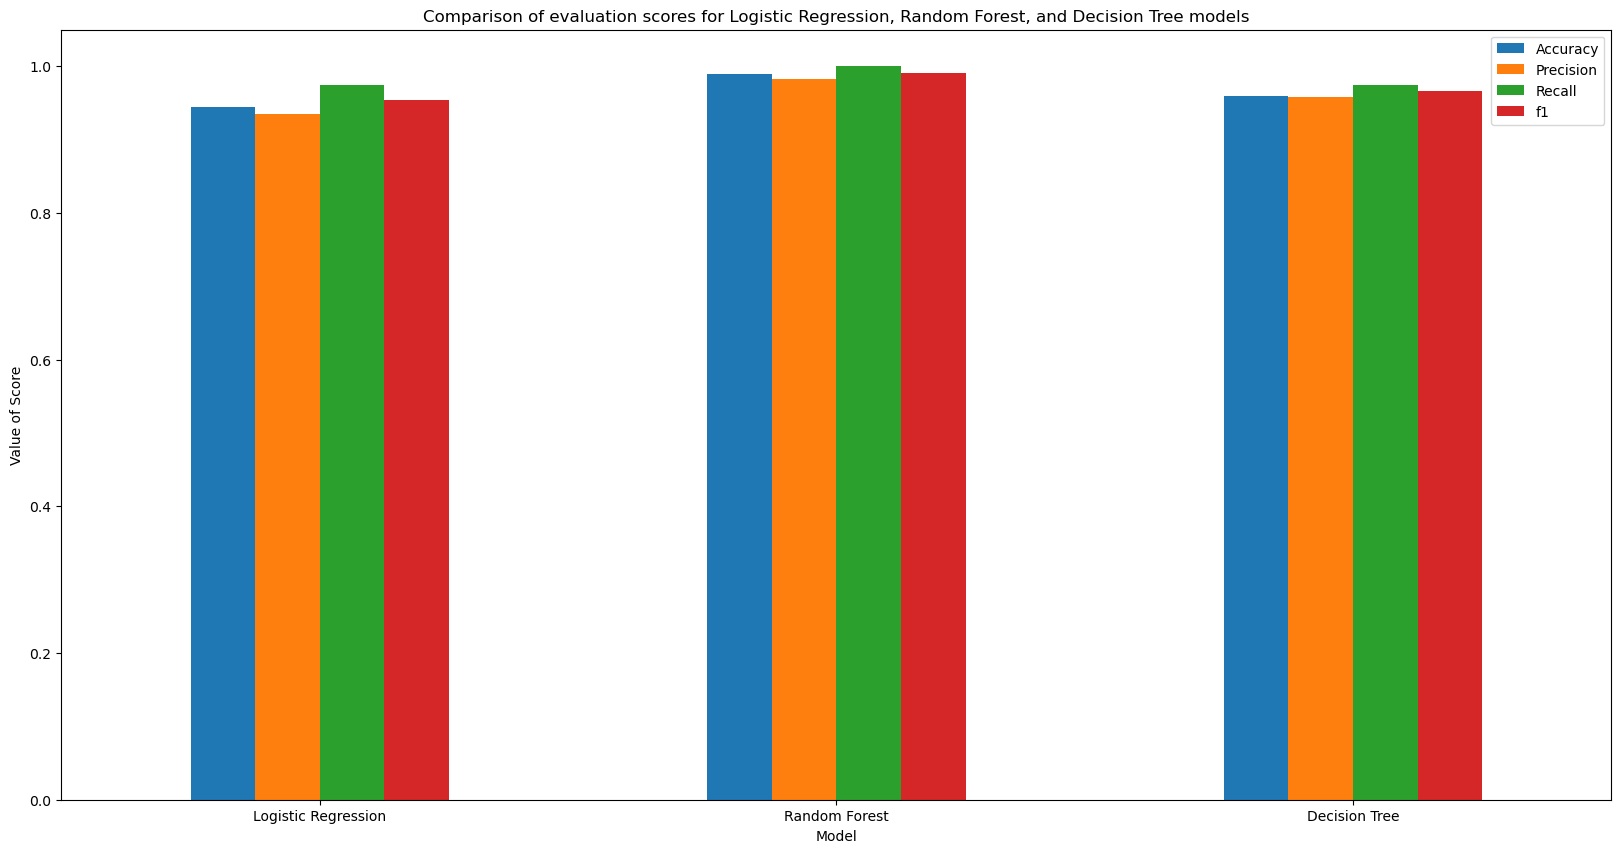

In [46]:
eval_df_Transposed.plot(kind='bar', figsize=(20, 10))

plt.title("Comparison of evaluation scores for Logistic Regression, Random Forest, and Decision Tree models")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.ylabel("Value of Score");

In [47]:
eval_df_Transposed.index

Index(['Logistic Regression', 'Random Forest', 'Decision Tree'], dtype='object')

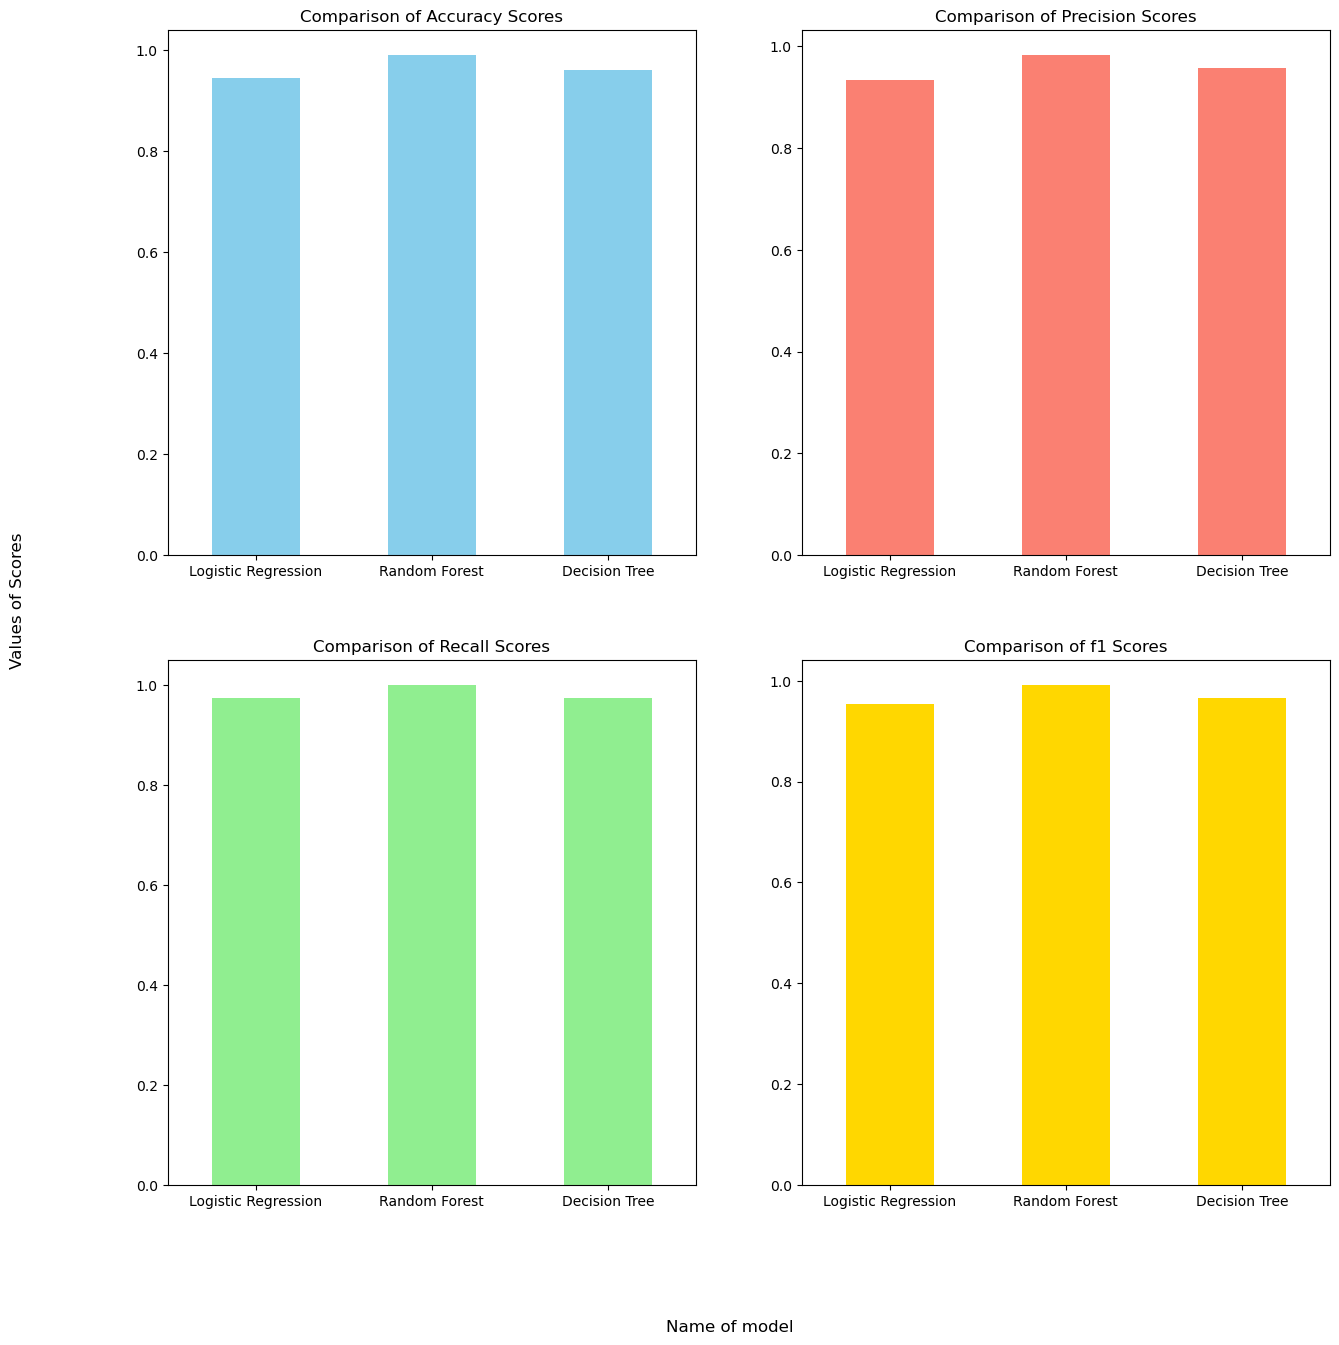

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

labels = eval_df_Transposed.index
fig.supxlabel('Name of model')
fig.supylabel('Values of Scores')
    
# Plot accuracy
eval_df_Transposed['Accuracy'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Comparison of Accuracy Scores')
axes[0,0].set_xticklabels(labels=labels, rotation=0)

# Plot precision
eval_df_Transposed['Precision'].plot(kind='bar', ax=axes[0,1], color='salmon')
axes[0,1].set_title('Comparison of Precision Scores')
axes[0,1].set_xticklabels(labels=labels, rotation=0)

# Plot recall
eval_df_Transposed['Recall'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Comparison of Recall Scores')
axes[1,0].set_xticklabels(labels=labels, rotation=0)

# Plot f1 score
eval_df_Transposed['f1'].plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Comparison of f1 Scores')
axes[1,1].set_xticklabels(labels=labels, rotation=0);


#### ROC and AUC of the models

In [49]:
# function to evaluate models using roc

def roc_auc(model, X_train, X_test, y_train, y_test):
    # fit the model
    model.fit(X_train, y_train)
    
    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.grid(True)

C:\Users\chiri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


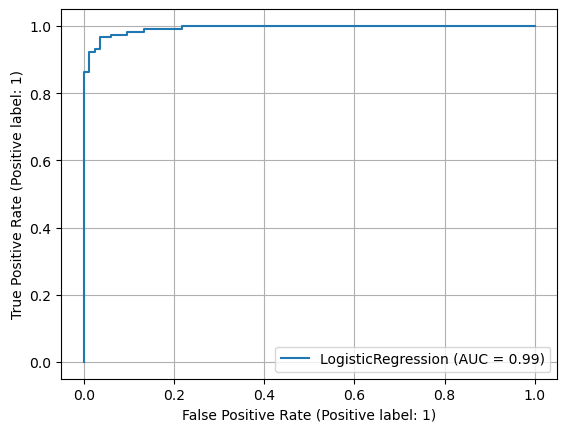

In [50]:
log_model = LogisticRegression()
roc_auc(log_model, X_train, X_test, y_train, y_test)

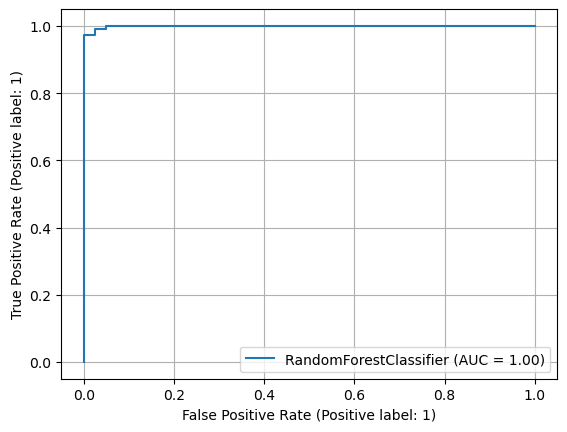

In [51]:
rand_model = RandomForestClassifier()
roc_auc(rand_model, X_train, X_test, y_train, y_test)

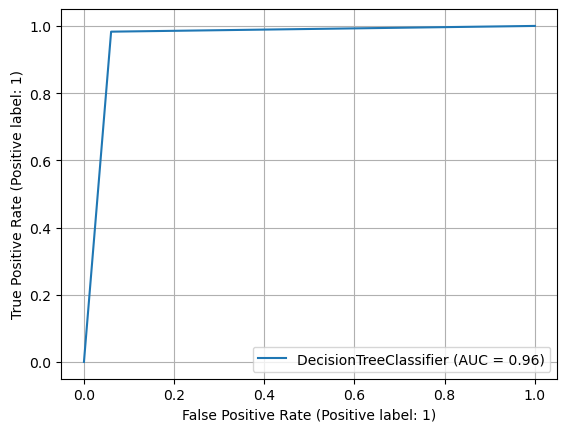

In [52]:
tree_model = DecisionTreeClassifier()
roc_auc(tree_model, X_train, X_test, y_train, y_test)

#### Feature Importance

#### 7.3 Neural Network

In [53]:
# importing required libraries to build NN
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
# from keras.metrics import categorical_crossentropy

In [54]:
# checking training and testing sizes
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

X_train: (800, 12)
y_train: (800,)
X_test: (200, 12)
y_test: (200,)


In [55]:
# building the model using Sequential API
keras_model = Sequential()

# building the model
keras_model.add(Dense(16, input_shape=(12,), activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

# compiling the model
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# accessing the layers
keras_model.layers

In [58]:
# training the model
keras_model.fit(X_train, y_train, epochs=20, batch_size=100)

Epoch 1/20


8/8 [==============================] - 2s 4ms/step - loss: 27.2980 - accuracy: 0.4212
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 5.8199 - accuracy: 0.4800
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 5.4823 - accuracy: 0.5788
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 2.2523 - accuracy: 0.5412
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 1.5793 - accuracy: 0.5263
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 1.2437 - accuracy: 0.6438
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 1.0050 - accuracy: 0.5962
Epoch 8/20
8/8 [==============================] - 0s 2ms/step - loss: 0.8808 - accuracy: 0.6538
Epoch 9/20
8/8 [==============================] - 0s 2ms/step - loss: 0.8204 - accuracy: 0.6288
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.6625
Epoch 11/20
8/8 [===================

In [60]:
# evaluating the modeL
loss, accuracy = keras_model.evaluate(X_test, y_test)
print('loss = ', loss)
print('accuracy = ', accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.6850
loss =  0.6146661043167114
accuracy =  0.6850000023841858


In [62]:
# predicting
predicted = keras_model.predict(X_test_scaled)

7/7 [==============================] - 0s 3ms/step


In [63]:
precision_score(y_test, predicted)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# evaluation of predictions using confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x>=0.5 else 0 for x in predicted])

actual = np.array(y_test)

conf_mtx = confusion_matrix(actual, predicted)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)
display.plot()
